# 1. load packages, set working directory, read in data and functions 

In [ ]:
dir.create("integration_example1")
setwd("integration_example1")

In [ ]:
library(Seurat)
library(tidyverse)

In [ ]:
##Read in the easysci dataset (subsampled 5000 cells per main cluster) and trackersci dataset as in seurat objects
Seu_trackersci=readRDS("integration_example1/Seu_trackersci.rds")
Seu_easysci=readRDS("integration_example1/Seu_easysci_subset.rds")

In [ ]:
Seu_trackersci@meta.data[which(Seu_trackersci@meta.data$EdU=='EdU'),'dataset']='TrackerSci_EdU'
Seu_trackersci@meta.data[which(Seu_trackersci@meta.data$EdU=='DAPI'),'dataset']='TrackerSci_DAPI'
Seu_easysci@meta.data$dataset='EasySci'

# 2. perform integration analysis

In [ ]:
Seu.list = list(Seu_trackersci,Seu_easysci)

In [ ]:
##Perform seurat integrations, the results will be a seurat object named as "Seu.combined"
seu.list <- lapply(X = Seu.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 5000)
})

# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = seu.list)
anchors <- FindIntegrationAnchors(object.list = seu.list, anchor.features = features)
Seu.combined <- IntegrateData(anchorset = anchors)
DefaultAssay(Seu.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
Seu.combined <- ScaleData(Seu.combined, verbose = FALSE)
Seu.combined <- RunPCA(Seu.combined, npcs = 50, verbose = FALSE)
Seu.combined <- RunUMAP(Seu.combined, reduction = "pca", dims = 1:50,)
Seu.combined <- FindNeighbors(Seu.combined, reduction = "pca", dims = 1:50)
Seu.combined <- FindClusters(Seu.combined, resolution = 0.5)

In [ ]:
saveRDS(Seu.combined,'integration_example1/combined.rds')

# 3. check output

In [1]:
library(Seurat)
library(ggplot2)

Attaching SeuratObject



In [2]:
Seu.combined =readRDS("integration_example1/combined.rds")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



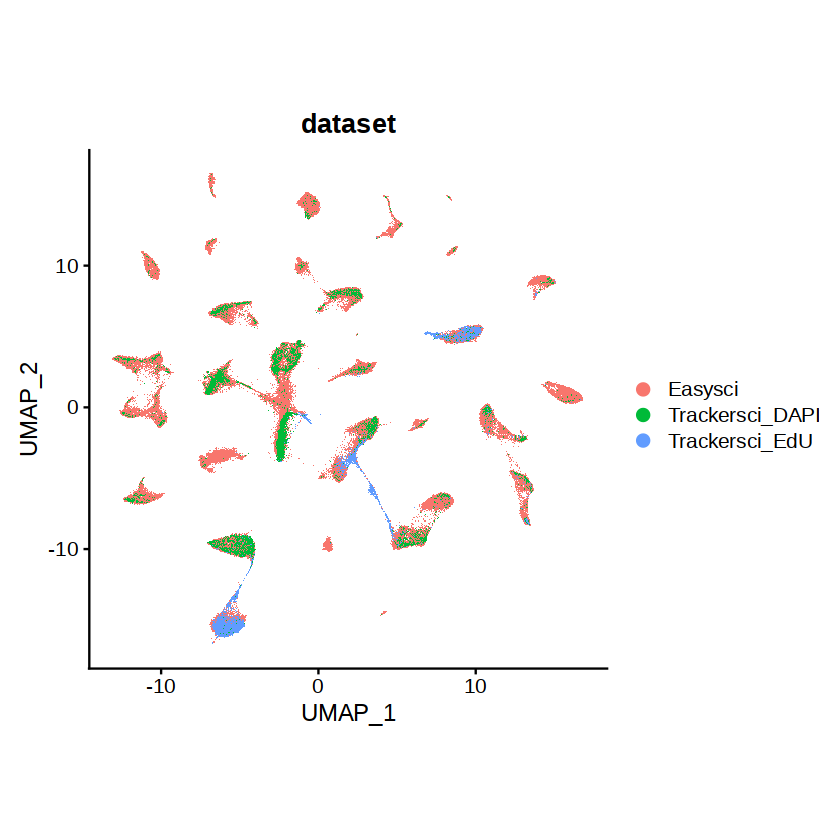

In [3]:
DimPlot(Seu.combined,group.by = 'dataset')+theme(aspect.ratio = 1)